### <center> EE492 PROJECT


#### <center> University Entrance Exam Data Science Studies
<center>Berke Eren / 250206008  
<center>Korkut Emre Arslantürk / 250206039 


#### Data Analysis

In [1]:
import numpy as np #matrix operations
import seaborn as sns #advanced visualization
import sklearn #machine learning tools
import matplotlib.pyplot as plt #basic visualization
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
import os
import pandas as pd
os.getcwd()
osym_data = pd.read_excel("alldata.xlsx")
osym_data=osym_data.drop(["bu_yil_siralama"],axis=1)
osym_data=osym_data.drop(["onceki_yil_siralama"],axis=1)
osym_data=osym_data.drop(["senevs"],axis=1)
osym_data=osym_data.drop(["bu_yil_yerlesen"],axis=1)
bigdata=osym_data
pointreg_data=bigdata
pointreg_data=pointreg_data.drop(["okul"],axis=1)
pointreg_data=pointreg_data.drop(["sehir"],axis=1)

In [2]:
pointreg_data.head()

,burs,onceki_yil_taban_puan,onceki_yil_tavan_puan,onceki_yil_yerlesen,onceki_yil_kontenjan,bu_yil_taban_puan,bu_yil_kontenjan
0,1.0,524.218,562.576,80,80,534.668,80
1,1.0,535.247,550.920,7,7,543.234,8
2,1.0,517.675,550.085,50,50,530.936,50
3,1.0,503.028,526.570,110,110,519.508,110
4,1.0,489.537,519.962,115,115,510.434,115


In [3]:
pointreg_data.describe()

,burs,onceki_yil_taban_puan,onceki_yil_tavan_puan,onceki_yil_yerlesen,onceki_yil_kontenjan,bu_yil_taban_puan,bu_yil_kontenjan
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,0.848606,357.140041,401.655575,42.290837,43.752988,363.822910,45.746348
std,0.268878,80.528966,71.237404,31.814901,31.096753,78.748383,31.499801
min,0.000000,244.990130,251.565730,1.000000,1.000000,247.921170,1.000000
25%,0.750000,285.337050,346.207810,10.000000,12.000000,294.711500,13.000000
50%,1.000000,343.485920,398.936220,45.000000,47.000000,356.846060,50.000000
75%,1.000000,420.953340,450.488000,70.000000,70.000000,424.847680,70.000000
max,1.000000,546.347000,581.805000,150.000000,150.000000,546.347000,150.000000


array([[<AxesSubplot:xlabel='burs', ylabel='burs'>,
        <AxesSubplot:xlabel='onceki_yil_taban_puan', ylabel='burs'>,
        <AxesSubplot:xlabel='onceki_yil_tavan_puan', ylabel='burs'>,
        <AxesSubplot:xlabel='onceki_yil_yerlesen', ylabel='burs'>,
        <AxesSubplot:xlabel='onceki_yil_kontenjan', ylabel='burs'>,
        <AxesSubplot:xlabel='bu_yil_kontenjan', ylabel='burs'>],
       [<AxesSubplot:xlabel='burs', ylabel='onceki_yil_taban_puan'>,
        <AxesSubplot:xlabel='onceki_yil_taban_puan', ylabel='onceki_yil_taban_puan'>,
        <AxesSubplot:xlabel='onceki_yil_tavan_puan', ylabel='onceki_yil_taban_puan'>,
        <AxesSubplot:xlabel='onceki_yil_yerlesen', ylabel='onceki_yil_taban_puan'>,
        <AxesSubplot:xlabel='onceki_yil_kontenjan', ylabel='onceki_yil_taban_puan'>,
        <AxesSubplot:xlabel='bu_yil_kontenjan', ylabel='onceki_yil_taban_puan'>],
       [<AxesSubplot:xlabel='burs', ylabel='onceki_yil_tavan_puan'>,
        <AxesSubplot:xlabel='onceki_yil_taban_pua

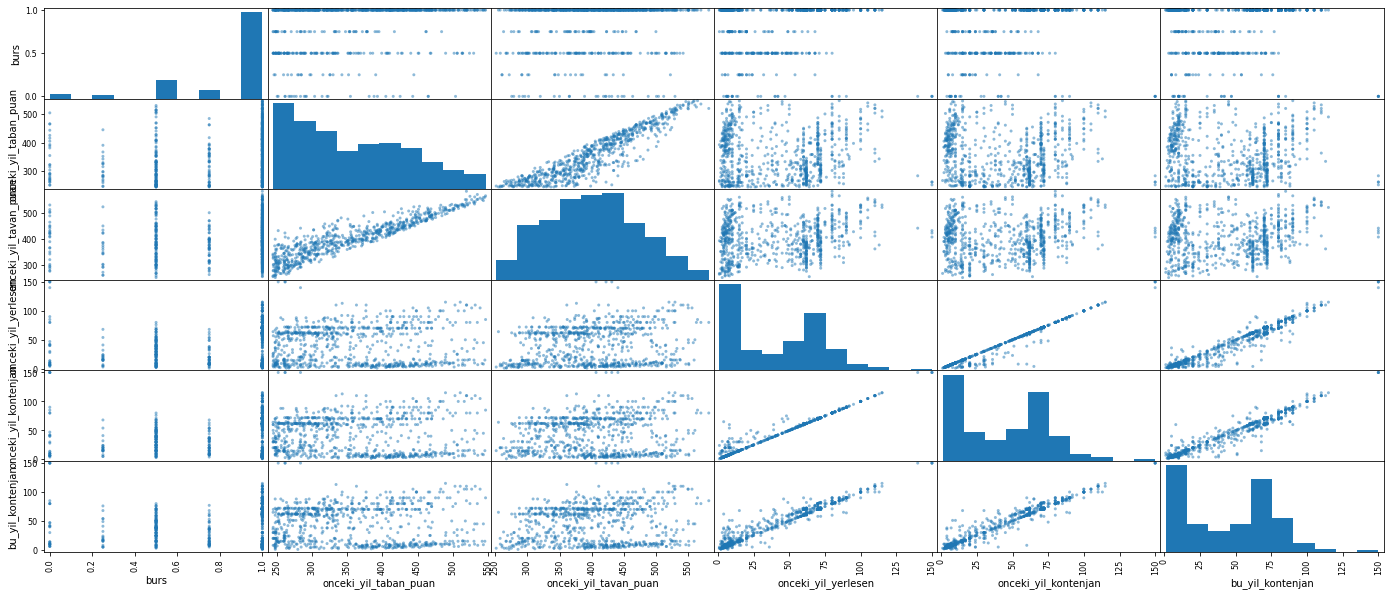

In [4]:
np.random.seed(42)
from pandas.plotting import scatter_matrix
attributes = ["burs","onceki_yil_taban_puan", "onceki_yil_tavan_puan", "onceki_yil_yerlesen","onceki_yil_kontenjan", "bu_yil_kontenjan"]
scatter_matrix(pointreg_data[attributes], figsize=(24, 10))

#### Taban Puan Prediction

##### Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression
x = pointreg_data.drop(["bu_yil_taban_puan"], axis=1)
y = pointreg_data["bu_yil_taban_puan"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train,y_train)
y_pred = multiple_linear_regression.predict(X_test)
y_pred_train = multiple_linear_regression.predict(X_train)

Two examples of related model can be seen in that part.

In [6]:
from sklearn import metrics
print('Train: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Test: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("İyte Üniversitesi 2021 Taban Puan Prediction (Real Value: 442.565) : ", multiple_linear_regression.predict(np.array([[1.0,495.967,527.787,80,80,90]])))
print("Ege Üniversitesi 2021 Taban Puan Prediction (Real Value: 427.594) : ", multiple_linear_regression.predict(np.array([[1.0,482.840,528.534,100,105,105]])))

Train: Root Mean Squared Error: 33.26019810496686
Test: Root Mean Squared Error: 31.565037803727765
İyte Üniversitesi 2021 Taban Puan Prediction (Real Value: 442.565) :  [485.1928444]
Ege Üniversitesi 2021 Taban Puan Prediction (Real Value: 427.594) :  [467.60771116]


Text(0, 0.5, 'Actual Taban Puan')

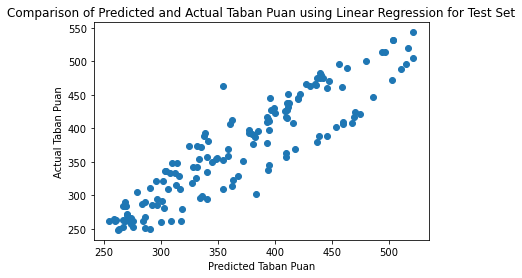

In [7]:
import matplotlib.pyplot as plt #basic visualization

plt.scatter(y_pred, y_test)
plt.title("Comparison of Predicted and Actual Taban Puan using Linear Regression for Test Set")
plt.xlabel("Predicted Taban Puan")
plt.ylabel("Actual Taban Puan")


Text(0, 0.5, 'Actual Taban Puan')

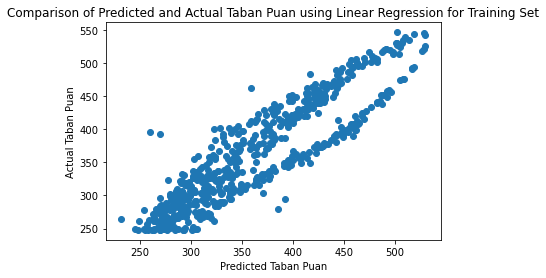

In [8]:
import matplotlib.pyplot as plt #basic visualization

plt.scatter(y_pred_train, y_train)
plt.title("Comparison of Predicted and Actual Taban Puan using Linear Regression for Training Set")
plt.xlabel("Predicted Taban Puan")
plt.ylabel("Actual Taban Puan")

##### Partial Dependence for Linear Regression

Computing partial dependence plots...


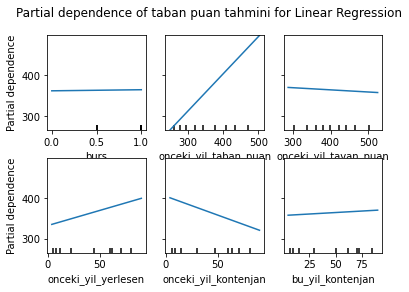

In [9]:
from time import time
print('Computing partial dependence plots...')
tic = time()
# We don't compute the 2-way PDP (5, 1) here, because it is a lot slower
# with the brute method.
features = ['burs', 'onceki_yil_taban_puan', 'onceki_yil_tavan_puan','onceki_yil_yerlesen','onceki_yil_kontenjan','bu_yil_kontenjan']
plot_partial_dependence(multiple_linear_regression.fit(x,y), x, features,
                        n_jobs=6, grid_resolution=20)

fig = plt.gcf()
fig.suptitle('Partial dependence of taban puan tahmini for Linear Regression')
fig.subplots_adjust(hspace=0.3)

##### Feature Importance

Feature: 0, Score: 2.65810
Feature: 1, Score: 0.91287
Feature: 2, Score: -0.05279
Feature: 3, Score: 0.74073
Feature: 4, Score: -0.92365
Feature: 5, Score: 0.14543


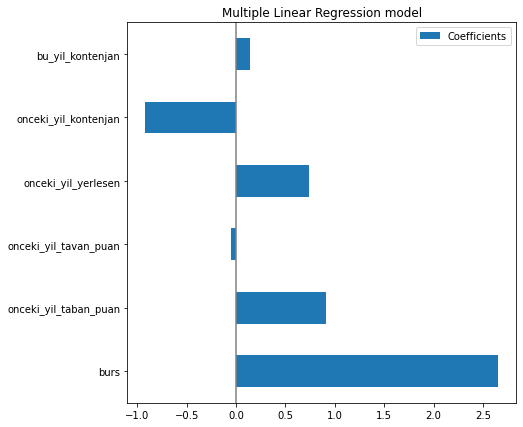

In [10]:
import matplotlib.pyplot as plt
importance = multiple_linear_regression.coef_

coefs = pd.DataFrame(
   multiple_linear_regression.coef_,
   columns=['Coefficients'], index=x.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Multiple Linear Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % ((i),v))

(0.0, 100.0)

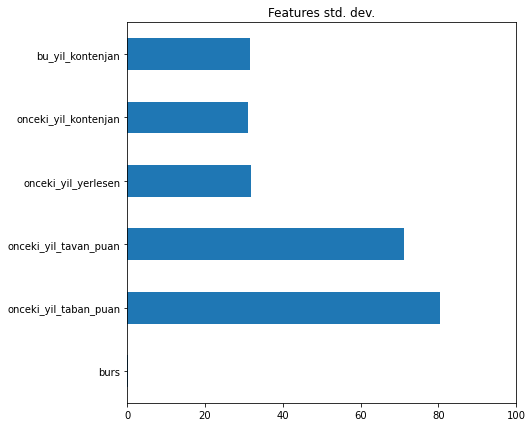

In [11]:
x.std(axis=0).plot(kind='barh', figsize=(9, 7))
plt.title('Features std. dev.')
plt.subplots_adjust(left=.3)
plt.xlim((0, 100))

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
model = make_pipeline(StandardScaler(), RidgeCV())
model.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

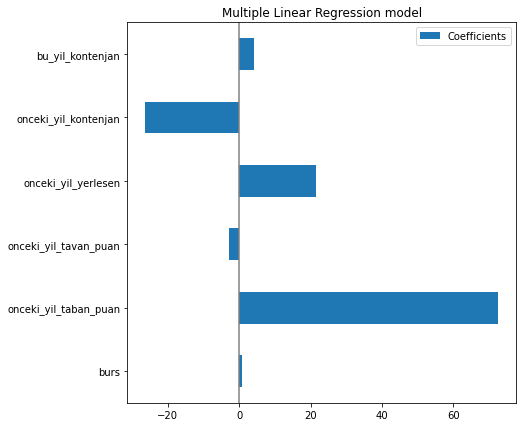

In [13]:
coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=x.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Multiple Linear Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [14]:
coefs

,Coefficients
burs,0.808563
onceki_yil_taban_puan,72.680963
onceki_yil_tavan_puan,-2.922814
onceki_yil_yerlesen,21.434697
onceki_yil_kontenjan,-26.396513
bu_yil_kontenjan,4.236274


##### Random Forest

In [15]:
A = pointreg_data.drop(["bu_yil_taban_puan"], axis=1)
b = pointreg_data["bu_yil_taban_puan"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(A,b, test_size=0.20, random_state=42)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=1000,max_features=0.4, max_depth=50,min_samples_leaf=3,random_state=0)
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
print("İyte Üniversitesi 2021 Taban Puan Prediction (Real Value: 442.565) : ", regressor.predict(np.array([[1.0,495.967,527.787,80,80,90]])))
print("Ege Üniversitesi 2021 Taban Puan Prediction (Real Value: 427.594) : ", regressor.predict(np.array([[1.0,482.840,528.534,100,105,105]])))
print('Test: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Train: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

İyte Üniversitesi 2021 Taban Puan Prediction (Real Value: 442.565) :  [466.11227747]
Ege Üniversitesi 2021 Taban Puan Prediction (Real Value: 427.594) :  [476.08614075]
Test: Root Mean Squared Error: 32.05052623846486
Train: Root Mean Squared Error: 22.879065583492558


Text(0, 0.5, 'Actual Taban Puan')

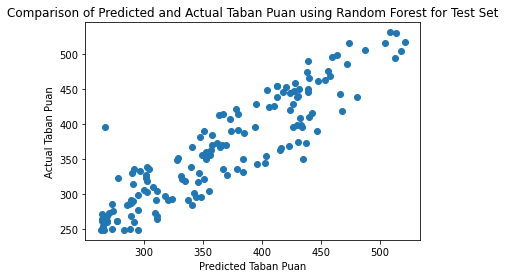

In [16]:

plt.scatter(y_pred_test, y_test)
plt.title("Comparison of Predicted and Actual Taban Puan using Random Forest for Test Set")
plt.xlabel("Predicted Taban Puan")
plt.ylabel("Actual Taban Puan")

Text(0, 0.5, 'Actual Taban Puan')

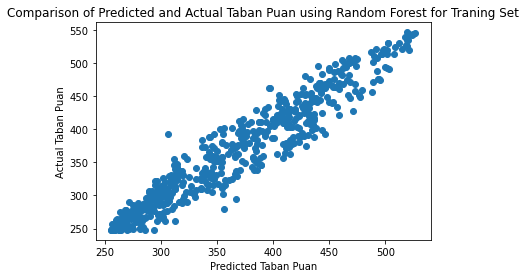

In [17]:
plt.scatter(y_pred_train, y_train)
plt.title("Comparison of Predicted and Actual Taban Puan using Random Forest for Traning Set")
plt.xlabel("Predicted Taban Puan")
plt.ylabel("Actual Taban Puan")

##### Decision Tree

In [18]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
X = pointreg_data.drop('bu_yil_taban_puan', axis=1)
y = pointreg_data['bu_yil_taban_puan']
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 359.53
|   |--- feature_1 <= 306.63
|   |   |--- feature_1 <= 260.68
|   |   |   |--- value: [262.11]
|   |   |--- feature_1 >  260.68
|   |   |   |--- value: [295.72]
|   |--- feature_1 >  306.63
|   |   |--- feature_1 <= 336.99
|   |   |   |--- value: [337.18]
|   |   |--- feature_1 >  336.99
|   |   |   |--- value: [365.28]
|--- feature_1 >  359.53
|   |--- feature_2 <= 500.64
|   |   |--- feature_1 <= 407.91
|   |   |   |--- value: [390.99]
|   |   |--- feature_1 >  407.91
|   |   |   |--- value: [433.93]
|   |--- feature_2 >  500.64
|   |   |--- feature_1 <= 501.41
|   |   |   |--- value: [470.45]
|   |   |--- feature_1 >  501.41
|   |   |   |--- value: [512.08]



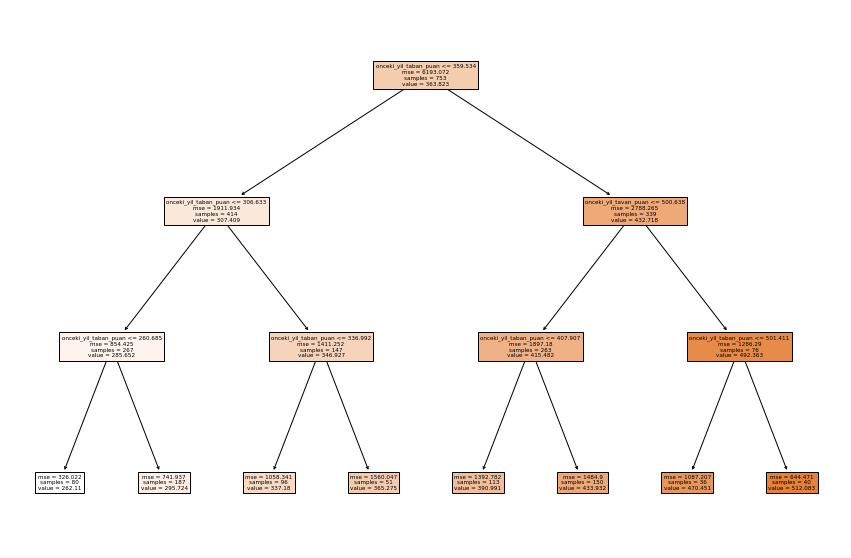

In [19]:
baslik=x.columns
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, feature_names= baslik, filled=True)
fig.savefig("decistion_tree.png")

##### Neural Network

In [20]:
x = pointreg_data.drop(["bu_yil_taban_puan"], axis=1)
y = pointreg_data["bu_yil_taban_puan"]

In [21]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [22]:
from keras.models import Sequential
from keras.layers.core import Dense , Dropout
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
X_train_full, X_test, y_train_full, y_test = train_test_split(
 x, y)
X_train, X_valid, y_train, y_valid = train_test_split(
 X_train_full, y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="tanh", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])
model.compile(loss=root_mean_squared_error, optimizer="RMSProp")
history = model.fit(X_train, y_train, epochs=1000,
 validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/1000
14/14 [==============================] - 0s 11ms/step - loss: 364.1291 - val_loss: 362.2662
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 363.0818 - val_loss: 361.2528
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 362.1673 - val_loss: 360.3543
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 361.2550 - val_loss: 359.4628
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 360.5847 - val_loss: 358.9515
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 360.1074 - val_loss: 358.4738
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 359.6145 - val_loss: 357.9305
Epoch 8/1000
14/14 [==============================] - 0s 2ms/step - loss: 359.0735 - val_loss: 357.3907
Epoch 9/1000
14/14 [==============================] - 0s 2ms/step - loss: 358.4778 - val_loss: 356.6965
Epoch 10/1000
14/14 [==============================] - 0s 2ms/s

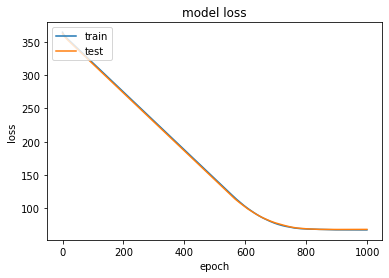

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### One Hot Encoding

In [25]:
import pandas as pd
df = pd.read_excel("alldata.xlsx")
df=df.drop(["sehir"],axis=1)
df=df.drop(["bu_yil_siralama"],axis=1)
df=df.drop(["onceki_yil_siralama"],axis=1)
df=df.drop(["senevs"],axis=1)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['okul']]).toarray())
final_df = df.join(encoder_df)
final_df=final_df.drop(["okul"],axis=1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
x = final_df.drop(["bu_yil_taban_puan"], axis=1)
y = final_df["bu_yil_taban_puan"]
X_train_full, X_test, y_train_full, y_test = train_test_split(
 x, y)
X_train, X_valid, y_train, y_valid = train_test_split(
 X_train_full, y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [26]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="tanh", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])
model.compile(loss=root_mean_squared_error, optimizer="RMSProp")
history = model.fit(X_train, y_train, epochs=1000,
 validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/1000
14/14 [==============================] - 0s 10ms/step - loss: 367.6867 - val_loss: 345.8302
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 366.8565 - val_loss: 344.9690
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 365.8601 - val_loss: 344.1494
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 365.1645 - val_loss: 343.4142
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 364.5331 - val_loss: 342.9601
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 364.0823 - val_loss: 342.5221
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 363.6425 - val_loss: 342.0878
Epoch 8/1000
14/14 [==============================] - 0s 2ms/step - loss: 363.2057 - val_loss: 341.6537
Epoch 9/1000
14/14 [==============================] - 0s 2ms/step - loss: 362.7708 - val_loss: 341.2196
Epoch 10/1000
14/14 [==============================] - 0s 2ms/s

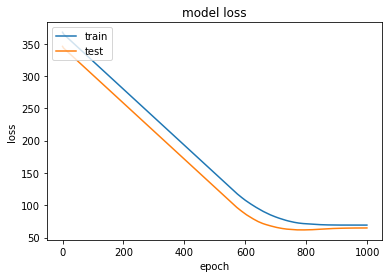

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Label Encoding for City feature

In [28]:
import numpy as np #matrix operations
import seaborn as sns #advanced visualization
import sklearn #machine learning tools
import matplotlib.pyplot as plt #basic visualization
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
import os
import pandas as pd
import fastai
fastai.__version__
from fastai.callback.all import *
from fastai.tabular.all import *

In [29]:
import pandas as pd
import numpy as np #matrix operations
osym_data = pd.read_excel("alldata.xlsx")
osym_data=osym_data.drop(["okul"],axis=1)
osym_data=osym_data.drop(["senevs"],axis=1)
osym_data=osym_data.drop(["bu_yil_siralama"],axis=1)
osym_data=osym_data.drop(["onceki_yil_siralama"],axis=1)
osym_data['sehir'] = osym_data['sehir'].astype('category')
dep_var = 'bu_yil_taban_puan'
df = osym_data

In [30]:
procs = [Categorify, FillMissing]
valid_idx=random.sample(range(753), 151)
total_idx=list(range(753))
j=1
while j<152:
        a=valid_idx[j-1]
        total_idx.remove(a);
        j=j+1

splits = (list(total_idx),list(valid_idx))

In [31]:
import fastai
fastai.__version__
from fastai.callback.all import *
from fastai.tabular.all import *

In [32]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [33]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [34]:
from sklearn.tree import DecisionTreeRegressor
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y);

In [35]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [36]:
m = DecisionTreeRegressor(min_samples_leaf=15)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(29.209427, 36.719283)

##### Random Forest

In [37]:
def rf(xs, y, n_estimators=40, max_samples=450,
 max_features=0.5, min_samples_leaf=5, **kwargs):
     return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
         max_samples=max_samples, max_features=max_features,
         min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [38]:
m = rf(xs, y);

In [39]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(25.907163, 33.868922)

In [40]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [41]:
r_mse(preds.mean(0), valid_y)

33.868922

Text(0.5, 0, 'epoch')

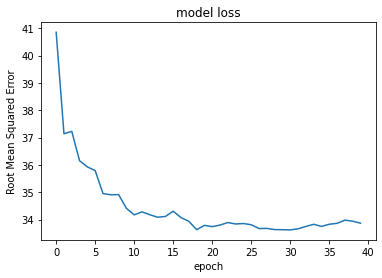

In [42]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);
plt.title('model loss')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('epoch')

##### Feature Importance

In [43]:
def rf_feat_importance(m, df):
     return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
         ).sort_values('imp', ascending=False)

In [44]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
2,onceki_yil_taban_puan,0.604481
3,onceki_yil_tavan_puan,0.305369
5,onceki_yil_kontenjan,0.021710
6,bu_yil_kontenjan,0.016335
4,onceki_yil_yerlesen,0.014213
0,sehir,0.013672
7,bu_yil_yerlesen,0.013511
1,burs,0.010708


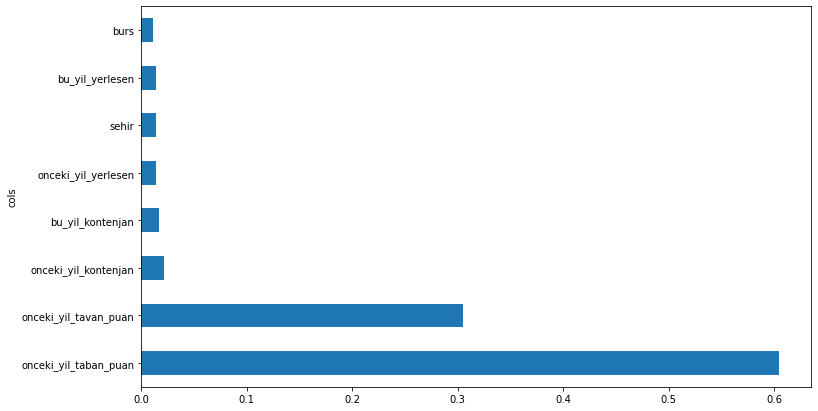

In [45]:
def plot_fi(fi):
     return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

##### Removing Low-Importance Variables

In [46]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

8

In [47]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]
m = rf(xs_imp, y)

In [48]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(25.657213, 34.196712)

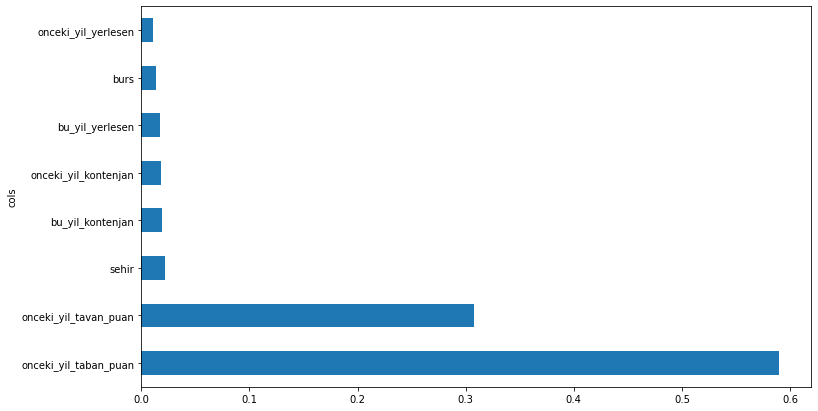

In [49]:
plot_fi(rf_feat_importance(m, xs_imp));

In [50]:
xs_final=xs_imp;
valid_xs_final=valid_xs_imp;

##### Partial Dependence

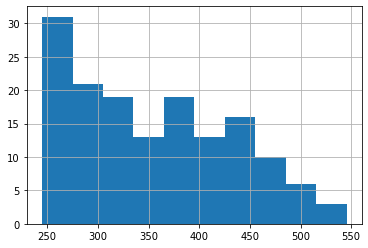

In [51]:
ax = valid_xs_final['onceki_yil_taban_puan'].hist()

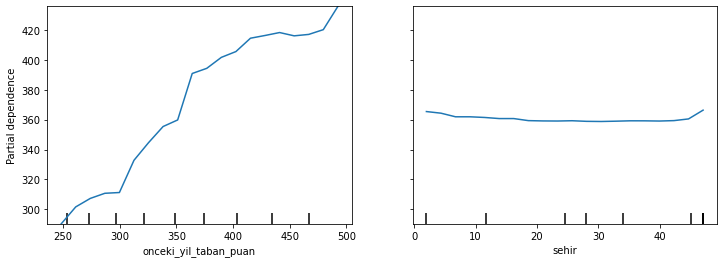

In [52]:
from sklearn.inspection import plot_partial_dependence
fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['onceki_yil_taban_puan','sehir'],
 grid_resolution=20, ax=ax);

##### Extrapolation and Neural Networks

In [53]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))
m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:7]

,cols,imp
0,onceki_yil_taban_puan,0.217535
1,onceki_yil_tavan_puan,0.215608
4,onceki_yil_yerlesen,0.118922
6,bu_yil_yerlesen,0.115704
5,sehir,0.110476
3,bu_yil_kontenjan,0.096183
2,onceki_yil_kontenjan,0.094990


In [54]:
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))
for c in ('onceki_yil_tavan_puan','onceki_yil_taban_puan','sehir','bu_yil_kontenjan','onceki_yil_yerlesen','onceki_yil_kontenjan'):
 m = rf(xs_final.drop(c,axis=1), y)
 print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 34.1981
onceki_yil_tavan_puan 34.589301
onceki_yil_taban_puan 39.11971
sehir 34.351346
bu_yil_kontenjan 34.716626
onceki_yil_yerlesen 34.291042
onceki_yil_kontenjan 33.924952


In [55]:
temp_1=xs_final.drop("bu_yil_kontenjan", axis=1)
temp_2=valid_xs_final.drop("bu_yil_kontenjan", axis=1)
xs_final_time = temp_1
valid_xs_time = temp_2
m = rf(xs_final_time, y)

In [56]:
temp_1=xs_final.drop("onceki_yil_tavan_puan", axis=1)
temp_2=valid_xs_final.drop("onceki_yil_tavan_puan", axis=1)
xs_final_time = temp_1
valid_xs_time = temp_2
m = rf(xs_final_time, y)

##### Using a Neural Network

In [57]:
df_nn = pd.read_excel("alldata.xlsx")
df_nn=df_nn.drop(["okul"],axis=1)
df_nn=df_nn.drop(["senevs"],axis=1)
df_nn=df_nn.drop(["bu_yil_siralama"],axis=1)
df_nn=df_nn.drop(["onceki_yil_siralama"],axis=1)
dep_var = 'bu_yil_taban_puan'
df_nn['sehir'] = df_nn['sehir'].astype('category')
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]

In [58]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [59]:
cont_nn.append('bu_yil_kontenjan')
cat_nn.remove('bu_yil_kontenjan')
cont_nn.append('bu_yil_yerlesen')
cat_nn.remove('bu_yil_yerlesen')
cont_nn.append('onceki_yil_kontenjan')
cat_nn.remove('onceki_yil_kontenjan')
cont_nn.append('onceki_yil_yerlesen')
cat_nn.remove('onceki_yil_yerlesen')

In [60]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
 splits=splits, y_names=dep_var)

In [61]:
dls = to_nn.dataloaders(32)
y = to_nn.train.y

In [62]:
learn = tabular_learner(dls, y_range=(247,547), layers=[100,200],
 n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.0014454397605732083)

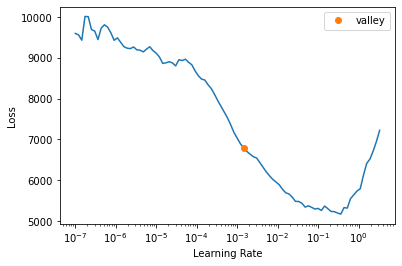

In [63]:
learn.lr_find()

In [64]:
learn.fit_one_cycle(6, 1e-3)

epoch,train_loss,valid_loss,time
0,5262.835938,4394.976562,00:00
1,3641.431396,2130.888916,00:00
2,2898.375977,1707.099487,00:00
3,2400.395752,1348.002075,00:00
4,2086.592773,1184.126709,00:00
5,1883.118896,1217.716064,00:00


In [65]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

34.895789

In [66]:
learn.show_results()

,sehir,onceki_yil_taban_puan,burs,bu_yil_kontenjan,bu_yil_yerlesen,onceki_yil_kontenjan,onceki_yil_yerlesen,bu_yil_taban_puan,bu_yil_taban_puan_pred
0,28.0,-0.956841,0.580567,-1.442172,-1.397201,-1.067778,-1.286094,267.445557,303.805359
1,47.0,-1.289052,-1.220987,0.176456,0.206180,0.632503,0.665293,279.049255,282.780457
2,26.0,-1.019931,0.580567,-1.029581,-0.988496,-0.971535,-0.908406,273.339111,302.978638
3,26.0,-1.206472,0.580567,-0.997843,-0.988496,-0.939455,-0.876932,252.332932,294.814423
4,3.0,-0.306911,-1.220987,0.144718,0.174742,-0.073274,-0.027135,326.687836,351.822235
5,47.0,0.726228,0.580567,-1.346959,-1.302884,-1.292343,-1.223146,432.346008,436.907043
6,3.0,0.813106,0.580567,0.747736,0.772080,0.824987,0.854137,462.700989,418.893768
7,22.0,-1.117826,0.580567,0.493834,0.520569,0.247533,0.287605,282.676514,302.248047
8,47.0,0.948692,0.580567,0.747736,0.772080,0.824987,0.854137,452.769012,433.679565


In [67]:
learn.model.embeds

ModuleList(
  (0): Embedding(50, 14)
)

In [68]:
cat_names = ['sehir']
variable = 'sehir'
ix = cat_names.index(variable)
var_vals = list(df[variable].astype('category').cat.categories.values)

In [69]:
import altair as alt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

emb_mx = to_np(next(learn.model.embeds[ix].parameters()))
X_emb = TSNE(n_components=2, perplexity=3).fit_transform(emb_mx)
#X_emb = PCA(n_components=2).fit_transform(emb_mx)
annotation = np.append('Other', np.array(var_vals))

In [70]:
emb_df = pd.DataFrame(X_emb, columns=['Dim1', 'Dim2'])
emb_df[variable]=annotation

In [71]:
points = alt.Chart(emb_df).mark_circle(size=60).encode(
    x='Dim1',
    y='Dim2',
    tooltip=[variable]
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text=variable
)

points + text

alt.LayerChart(...)

##### Label Encoding for School Name

In [72]:
import numpy as np #matrix operations
import seaborn as sns #advanced visualization
import sklearn #machine learning tools
import matplotlib.pyplot as plt #basic visualization
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
import os
import pandas as pd
import fastai
fastai.__version__
from fastai.callback.all import *
from fastai.tabular.all import *
os.getcwd()
osym_data = pd.read_excel("bigdata.xlsx")
osym_data=osym_data.drop(["sehir"],axis=1)
osym_data=osym_data.drop(["senevs"],axis=1)
osym_data=osym_data.drop(["bu_yil_siralama"],axis=1)
osym_data=osym_data.drop(["onceki_yil_siralama"],axis=1)
osym_data=osym_data.drop(["kontenort"],axis=1)
osym_data=osym_data.drop(["kontentahmin"],axis=1)
osym_data=osym_data.drop(["bu_yil_yerlesen"],axis=1)
osym_data['okul'] = osym_data['okul'].astype('category')
dep_var = 'bu_yil_taban_puan'
df = osym_data

procs = [Categorify, FillMissing]
valid_idx=random.sample(range(753), 151)
total_idx=list(range(753))
j=1
while j<152:
        a=valid_idx[j-1]
        total_idx.remove(a);
        j=j+1

splits = (list(total_idx),list(valid_idx))
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import datasets
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y);

In [74]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [75]:
m = DecisionTreeRegressor(min_samples_leaf=15)
m.fit(to.train.xs, to.train.y)
print('Root Mean Squared Error for Training:', m_rmse(m, xs, y))
print('Root Mean Squared Error for Validation:', m_rmse(m, valid_xs, valid_y))

Root Mean Squared Error for Training: 29.805989
Root Mean Squared Error for Validation: 35.373666


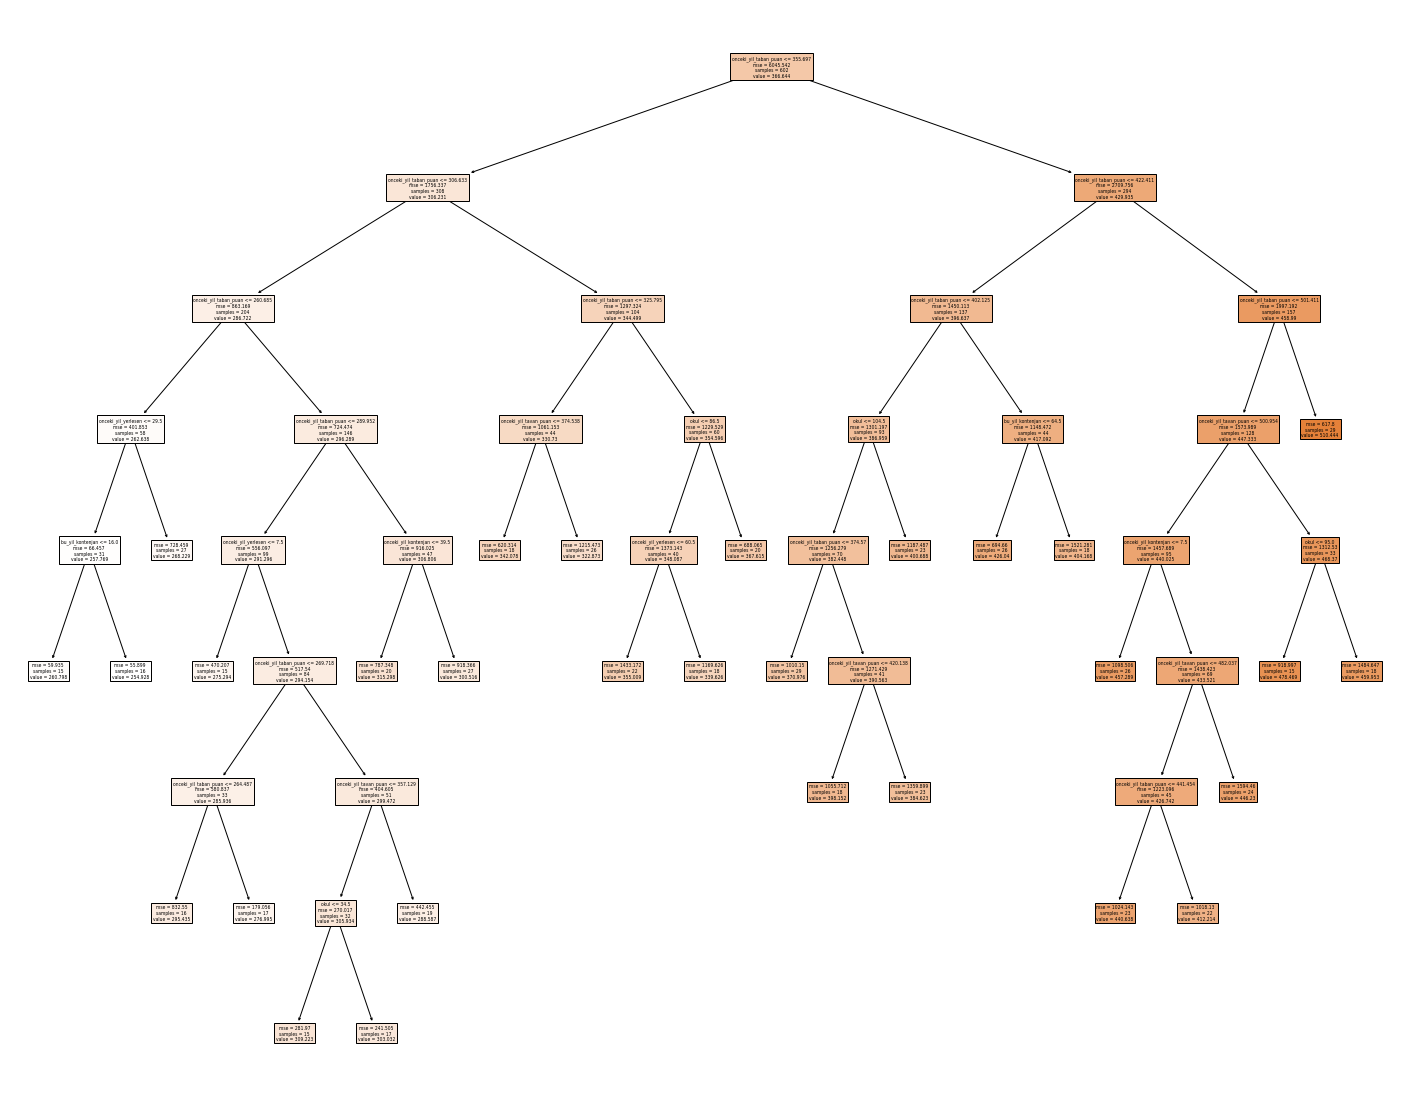

In [76]:
baslik=xs.columns
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(m, feature_names= baslik, filled=True)

Text(0, 0.5, 'Actual Points')

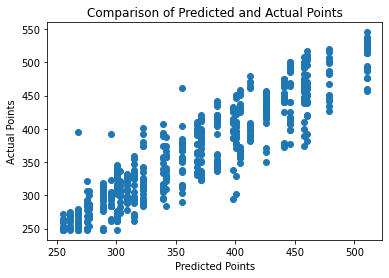

In [77]:
pred=m.predict(xs)
plt.scatter(pred, y)
matplotlib.pyplot.title("Comparison of Predicted and Actual Points")
plt.xlabel("Predicted Points")
plt.ylabel("Actual Points")

##### Label Encoding for City and University

In [78]:
osym_data = pd.read_excel("bigdata.xlsx")
osym_data=osym_data.drop(["senevs"],axis=1)
osym_data=osym_data.drop(["bu_yil_siralama"],axis=1)
osym_data=osym_data.drop(["onceki_yil_siralama"],axis=1)
osym_data=osym_data.drop(["kontentahmin"],axis=1)
osym_data=osym_data.drop(["bu_yil_yerlesen"],axis=1)

osym_data['okul'] = osym_data['okul'].astype('category')
osym_data['sehir'] = osym_data['sehir'].astype('category')
dep_var = 'bu_yil_taban_puan'
procs = [Categorify, FillMissing]
valid_idx=random.sample(range(753), 151)
total_idx=list(range(753))
j=1
while j<152:
        a=valid_idx[j-1]
        total_idx.remove(a);
        j=j+1

splits = (list(total_idx),list(valid_idx))
cont,cat = cont_cat_split(osym_data, 1, dep_var=dep_var)
to = TabularPandas(osym_data, procs, cat, cont, y_names=dep_var, splits=splits)
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

frames = [xs,valid_xs]
result = pd.concat(frames)

from sklearn.tree import DecisionTreeRegressor
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y);
m = DecisionTreeRegressor(min_samples_leaf=15)
m.fit(to.train.xs, to.train.y)
predicted=m.predict(xs)
predicted_valid=m.predict(valid_xs)

print('Root Mean Squared Error:', m_rmse(m, xs, y))
print('Root Mean Squared Error:', m_rmse(m, valid_xs, valid_y))

Root Mean Squared Error: 29.17765
Root Mean Squared Error: 34.005281


Text(0, 0.5, 'Actual Taban Puan')

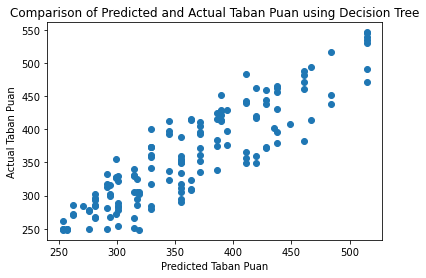

In [79]:
y_pred_val=m.predict(valid_xs)
plt.scatter(y_pred_val, valid_y)
plt.title("Comparison of Predicted and Actual Taban Puan using Decision Tree")
plt.xlabel("Predicted Taban Puan")
plt.ylabel("Actual Taban Puan")

Text(0, 0.5, 'Actual Taban Puan')

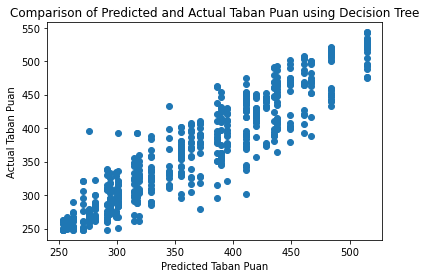

In [80]:
y_pred=m.predict(xs)
plt.scatter(y_pred, y)
plt.title("Comparison of Predicted and Actual Taban Puan using Decision Tree")
plt.xlabel("Predicted Taban Puan")
plt.ylabel("Actual Taban Puan")

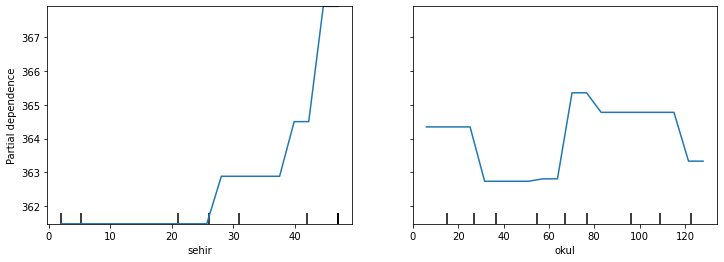

In [81]:
feature_names=xs.columns
from sklearn.inspection import plot_partial_dependence
fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs, ['sehir','okul'],
 grid_resolution=20, ax=ax);

In [82]:
tahmin1=m.predict(xs)
tahmin2=m.predict(valid_xs)
tahmin = np.concatenate((tahmin1, tahmin2))

#### Sıralama Estimatation

In [83]:
osym_data = pd.read_excel("bigdata.xlsx")
osym_data=osym_data.drop(["sehir"],axis=1)
osym_data=osym_data.drop(["okul"],axis=1)
osym_data=osym_data.drop(["senevs"],axis=1)
osym_data=osym_data.drop(["bu_yil_taban_puan"],axis=1)
osym_data=osym_data.drop(["onceki_yil_taban_puan"],axis=1)
osym_data=osym_data.drop(["onceki_yil_tavan_puan"],axis=1)
osym_data=osym_data.drop(["kontenort"],axis=1)
osym_data=osym_data.drop(["kontentahmin"],axis=1)
from sklearn.linear_model import LinearRegression
x = osym_data.drop(["bu_yil_siralama"], axis=1)
y = osym_data["bu_yil_siralama"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
multiple_linear_regression = LinearRegression()
(multiple_linear_regression.fit(X_train,y_train))


LinearRegression()

In [84]:
i=1;
y_pred = multiple_linear_regression.predict(X_test)
y_predtra = multiple_linear_regression.predict(X_train)

while i < len(y_pred):
    y_pred[i-1]=int(abs(y_pred[i-1]))
    i=i+1;

i=1;

while i < len(y_predtra):
    y_predtra[i-1]=int(abs(y_predtra[i-1]))
    i=i+1;


In [85]:
from sklearn import metrics
from sklearn.metrics import median_absolute_error
print("İyte Üniversitesi 2021 Sıralama Prediction (Real Value: 15300) : ", int(abs(multiple_linear_regression.predict(np.array([[1.0,80,80,18300,90,90]])))))
print("Ege Üniversitesi 2021 Sıralama Prediction (Real Value: 23500) : ", int(abs(multiple_linear_regression.predict(np.array([[1.0,100,100,27600,105,105]])))))

print('Test: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Test: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_predtra)))
print("Median Absolute Error: ",median_absolute_error(y_test, y_pred))

İyte Üniversitesi 2021 Sıralama Prediction (Real Value: 15300) :  15619
Ege Üniversitesi 2021 Sıralama Prediction (Real Value: 23500) :  23433
Test: Root Mean Squared Error: 20476.51781465606
Test: Root Mean Squared Error: 25735.485368392303
Median Absolute Error:  4764.0


Text(0, 0.5, 'Actual Sıralama')

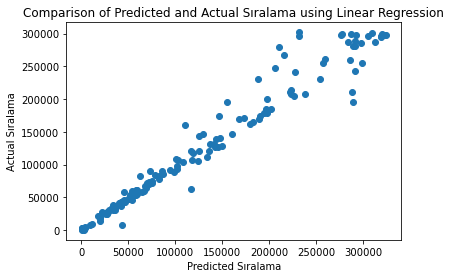

In [86]:
plt.scatter(y_pred, y_test)
plt.title("Comparison of Predicted and Actual Sıralama using Linear Regression")
plt.xlabel("Predicted Sıralama")
plt.ylabel("Actual Sıralama")

Text(0, 0.5, 'Actual Sıralama')

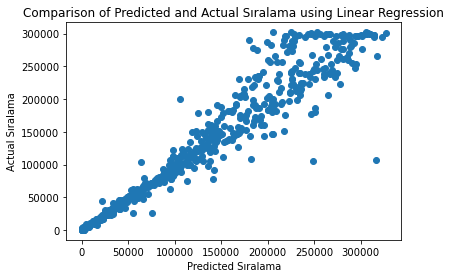

In [87]:
plt.scatter(y_predtra, y_train)
plt.title("Comparison of Predicted and Actual Sıralama using Linear Regression")
plt.xlabel("Predicted Sıralama")
plt.ylabel("Actual Sıralama")

##### Yapılan puan tahmini modele input olarak verilerek

In [88]:
osym_data = pd.read_excel("bigdata.xlsx")
osym_data=osym_data.drop(["senevs"],axis=1)
osym_data=osym_data.drop(["bu_yil_taban_puan"],axis=1)
osym_data=osym_data.drop(["onceki_yil_taban_puan"],axis=1)
osym_data=osym_data.drop(["onceki_yil_tavan_puan"],axis=1)
osym_data=osym_data.drop(["kontenort"],axis=1)
osym_data=osym_data.drop(["kontentahmin"],axis=1)

osym_data['okul'] = osym_data['okul'].astype('category')
osym_data['sehir'] = osym_data['sehir'].astype('category')
dep_var = 'bu_yil_siralama'
df = osym_data
df['tahmin'] = tahmin
procs = [Categorify, FillMissing]
valid_idx=random.sample(range(753), 151)
total_idx=list(range(753))
j=1
while j<152:
        a=valid_idx[j-1]
        total_idx.remove(a);
        j=j+1
splits = (list(total_idx),list(valid_idx))
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)
procs = [Categorify, FillMissing]
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y  


In [89]:
m = LinearRegression()
m.fit(xs,y);

In [90]:

m.fit(to.train.xs, to.train.y)
i=1;
y_pred = m.predict(xs)
y_predval = m.predict(valid_xs)
while i < len(y_pred):
    y_pred[i-1]=int(abs(y_pred[i-1]))
    i=i+1;

i=1;

while i < len(y_predval):
    y_predval[i-1]=int(abs(y_predval[i-1]))
    i=i+1;
    
from sklearn import metrics
from sklearn.metrics import r2_score

print("Training: Median Absolute Error: ",median_absolute_error(y, y_pred))
print("Test: Median Absolute Error: ",median_absolute_error(valid_y, y_predval))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, y_predval)))

Training: Median Absolute Error:  7053.0
Test: Median Absolute Error:  4895.0
Root Mean Squared Error: 24950.64261696371
Root Mean Squared Error: 23892.872731409687


Text(0, 0.5, 'Actual Sıralama')

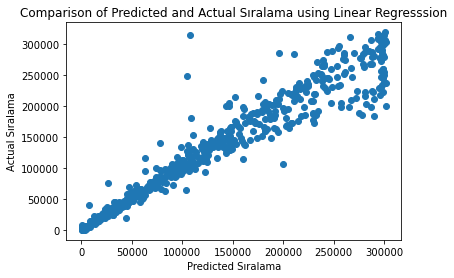

In [91]:
plt.scatter(y, y_pred)
plt.title("Comparison of Predicted and Actual Sıralama using Linear Regresssion")
plt.xlabel("Predicted Sıralama")
plt.ylabel("Actual Sıralama")

Text(0, 0.5, 'Actual Sıralama')

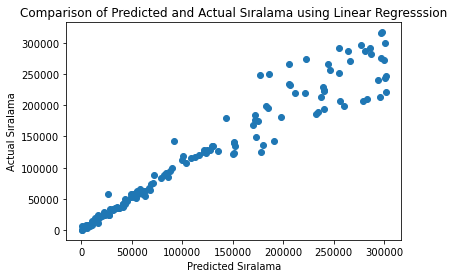

In [92]:
plt.scatter(valid_y, y_predval)
plt.title("Comparison of Predicted and Actual Sıralama using Linear Regresssion")
plt.xlabel("Predicted Sıralama")
plt.ylabel("Actual Sıralama")

#### Bölüm kontenjanı tamamlama problemini sınıflandırma problemi olarak çözmek 

##### Imbalanced data

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
data = pd.read_excel("bigdata.xlsx")
data=data.drop(["sehir"],axis=1)
data=data.drop(["senevs"],axis=1)
data=data.drop(["bu_yil_taban_puan"],axis=1)
data=data.drop(["kontentahmin"],axis=1)
data=data.drop(["bu_yil_yerlesen"],axis=1)
data=data.drop(["bu_yil_siralama"],axis=1)
data=data.drop(["okul"],axis=1)

dataset=data
data = dataset.iloc[:, :]
X= data.iloc[:, :-1].values
y = dataset.iloc[:, 7].values


X_train, X_test, y_train, y_test = train_test_split(
              X, y, test_size = 0.3, random_state = 0)
 
classifier=RandomForestClassifier()
classifier=classifier.fit(X_train,y_train)
predicted=classifier.predict(X_test)

#printing the results
print ('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))
print ('Accuracy Score :',accuracy_score(y_test, predicted))
print ('Report : ')
print (classification_report(y_test, predicted))

Confusion Matrix :
[[ 12   9]
 [  3 202]]
Accuracy Score : 0.9469026548672567
Report : 
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        21
           1       0.96      0.99      0.97       205

    accuracy                           0.95       226
   macro avg       0.88      0.78      0.82       226
weighted avg       0.94      0.95      0.94       226



##### Oversampling

In [94]:
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
data = pd.read_excel("bigdata.xlsx")
data=data.drop(["sehir"],axis=1)
data=data.drop(["senevs"],axis=1)
data=data.drop(["bu_yil_taban_puan"],axis=1)
data=data.drop(["kontentahmin"],axis=1)
data=data.drop(["bu_yil_yerlesen"],axis=1)
data=data.drop(["bu_yil_siralama"],axis=1)
data=data.drop(["okul"],axis=1)


data['kontenort'].value_counts()

1    687
0     66
Name: kontenort, dtype: int64

In [95]:
pca = PCA(n_components=2)
data_2d = pd.DataFrame(pca.fit_transform(data.iloc[:,0:16]))
data_2d= pd.concat([data_2d, data['kontenort']], axis=1)
data_2d.columns = ['x', 'y', 'class']
ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(data.iloc[:,0:16], data['kontenort'])
data_oversampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
data['bos'] = 0
data_oversampled.columns = data.columns 
data_oversampled=data_oversampled.drop(["bos"],axis=1)
dataset=data_oversampled
data = dataset.iloc[:, :]
X= data.iloc[:, :-1].values
y = dataset.iloc[:, 7].values


X_train, X_test, y_train, y_test = train_test_split(
              X, y, test_size = 0.3, random_state = 0)
 
classifier=RandomForestClassifier()
classifier=classifier.fit(X_train,y_train)
predicted=classifier.predict(X_test)

#printing the results
print ('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))
print ('Accuracy Score :',accuracy_score(y_test, predicted))
print ('Report : ')
print (classification_report(y_test, predicted))


Confusion Matrix :
[[182   7]
 [ 11 214]]
Accuracy Score : 0.9565217391304348
Report : 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       189
           1       0.97      0.95      0.96       225

    accuracy                           0.96       414
   macro avg       0.96      0.96      0.96       414
weighted avg       0.96      0.96      0.96       414



##### Yapılan puan tahmini modele input olarak verilerek

In [96]:
osym_data = pd.read_excel("bigdata.xlsx")
osym_data=osym_data.drop(["senevs"],axis=1)
osym_data=osym_data.drop(["bu_yil_siralama"],axis=1)
osym_data=osym_data.drop(["onceki_yil_siralama"],axis=1)
osym_data=osym_data.drop(["kontentahmin"],axis=1)
osym_data=osym_data.drop(["bu_yil_yerlesen"],axis=1)

osym_data['okul'] = osym_data['okul'].astype('category')
osym_data['sehir'] = osym_data['sehir'].astype('category')
dep_var = 'bu_yil_taban_puan'
procs = [Categorify, FillMissing]
valid_idx=random.sample(range(753), 151)
total_idx=list(range(753))
j=1
while j<152:
        a=valid_idx[j-1]
        total_idx.remove(a);
        j=j+1

splits = (list(total_idx),list(valid_idx))
cont,cat = cont_cat_split(osym_data, 1, dep_var=dep_var)
to = TabularPandas(osym_data, procs, cat, cont, y_names=dep_var)
df = pd.DataFrame(result)
cat_data=df
df['tahmin'] = tahmin
cat_data=cat_data.drop(["tahmin"],axis=1)

In [97]:
df = df[["okul","sehir","burs","onceki_yil_taban_puan", "onceki_yil_tavan_puan", "onceki_yil_yerlesen","onceki_yil_kontenjan","bu_yil_kontenjan","tahmin","kontenort"]]
data=df
data=data.drop(["okul"],axis=1)
data=data.drop(["sehir"],axis=1)
pca = PCA(n_components=2)
data_2d = pd.DataFrame(pca.fit_transform(data.iloc[:,0:16]))
data_2d= pd.concat([data_2d, data['kontenort']], axis=1)
data_2d.columns = ['x', 'y', 'class']
ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(data.iloc[:,0:16], data['kontenort'])
data_oversampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
data['bos'] = 0
data_oversampled.columns = data.columns 
data_oversampled=data_oversampled.drop(["bos"],axis=1)
dataset=data_oversampled
data = dataset.iloc[:, :]
X= data.iloc[:, :-1].values
y = dataset.iloc[:, 7].values


X_train, X_test, y_train, y_test = train_test_split(
              X, y, test_size = 0.3, random_state = 0)
 
classifier=RandomForestClassifier()
classifier=classifier.fit(X_train,y_train)
predicted=classifier.predict(X_test)

#printing the results
print ('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))
print ('Accuracy Score :',accuracy_score(y_test, predicted))
print ('Report : ')
print (classification_report(y_test, predicted))

Confusion Matrix :
[[192   7]
 [  7 209]]
Accuracy Score : 0.9662650602409638
Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       199
           1       0.97      0.97      0.97       216

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg       0.97      0.97      0.97       415



##### Categorical feature'ları modele dahil ederek

In [98]:
data=cat_data
pca = PCA(n_components=2)
data_2d = pd.DataFrame(pca.fit_transform(data.iloc[:,0:20]))
data_2d= pd.concat([data_2d, data['kontenort']], axis=1)
data_2d.columns = ['x', 'y', 'class']
ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(data.iloc[:,0:20], data['kontenort'])
data_oversampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
data['bos'] = 0



data_oversampled.columns = data.columns 
data_oversampled=data_oversampled.drop(["bos"],axis=1)


dataset=data_oversampled
data = dataset.iloc[:, :]
X= data.iloc[:, :-1].values
y = dataset.iloc[:, 8].values


X_train, X_test, y_train, y_test = train_test_split(
              X, y, test_size = 0.3, random_state = 0)
 
classifier=RandomForestClassifier()
classifier=classifier.fit(X_train,y_train)
predicted=classifier.predict(X_test)

#printing the results
print ('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))
print ('Accuracy Score :',accuracy_score(y_test, predicted))
print ('Report : ')
print (classification_report(y_test, predicted))

Confusion Matrix :
[[196   2]
 [ 11 203]]
Accuracy Score : 0.9684466019417476
Report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       198
           1       0.99      0.95      0.97       214

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



#### Yerleşen kişi sayısını tahmin etmek

In [99]:
howdata = pd.read_excel("bigdata.xlsx")
howdata=howdata.drop(["senevs"],axis=1)
howdata=howdata.drop(["bu_yil_siralama"],axis=1)
howdata=howdata.drop(["onceki_yil_siralama"],axis=1)
howdata=howdata.drop(["kontentahmin"],axis=1)
howdata=howdata.drop(["kontenort"],axis=1)
howdata=howdata.drop(["bu_yil_taban_puan"],axis=1)
howdata['okul'] = howdata['okul'].astype('category')
howdata['sehir'] = howdata['sehir'].astype('category')
dep_var = 'bu_yil_yerlesen'
df = howdata
procs = [Categorify, FillMissing]
valid_idx=random.sample(range(753), 151)
total_idx=list(range(753))
j=1
while j<152:
        a=valid_idx[j-1]
        total_idx.remove(a);
        j=j+1

splits = (list(total_idx),list(valid_idx))
cont,cat = cont_cat_split(howdata, 1, dep_var=dep_var)
to = TabularPandas(howdata, procs, cat, cont, y_names=dep_var, splits=splits)
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

from sklearn.tree import DecisionTreeRegressor
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y);
m = DecisionTreeRegressor(min_samples_leaf=15)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)
y_pred=m.predict(valid_xs)
y_pred_tra=m.predict(xs)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_tra)))
print("İyte Üniversitesi 2018 Yerleşen Prediction (Real Value: 90) : ", int(abs(m.predict(np.array([[137,48,1.0,425.882,463.411987,80,80,90]])))))
print("İSTANBUL ESENYURT ÜNİVERSİTESİ 2021 Yerleşen Prediction (Real Value: 7) : ", int(abs(m.predict(np.array([[47,122,0.75,284.144,337.625,7,24,13]])))))

Root Mean Squared Error: 2.8455343865020697
Root Mean Squared Error: 4.490313846978423
İyte Üniversitesi 2018 Yerleşen Prediction (Real Value: 90) :  90
İSTANBUL ESENYURT ÜNİVERSİTESİ 2021 Yerleşen Prediction (Real Value: 7) :  14


Text(0, 0.5, 'Actual Yerlesen')

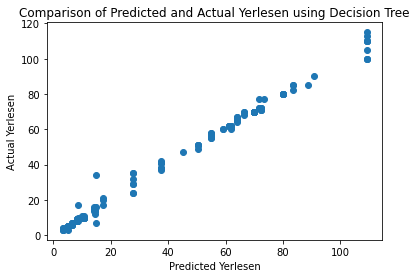

In [100]:
plt.scatter(y_pred, valid_y)
plt.title("Comparison of Predicted and Actual Yerlesen using Decision Tree")
plt.xlabel("Predicted Yerlesen")
plt.ylabel("Actual Yerlesen")

##### Gerçekleştirilen Taban Puan Tahmininin Modele input olarak verilmesi ile yerleşen kişi sayısı tahmini

In [101]:
howdata = pd.read_excel("bigdata.xlsx")
howdata=howdata.drop(["senevs"],axis=1)
howdata=howdata.drop(["bu_yil_siralama"],axis=1)
howdata=howdata.drop(["onceki_yil_siralama"],axis=1)
howdata=howdata.drop(["kontentahmin"],axis=1)
howdata=howdata.drop(["kontenort"],axis=1)
howdata=howdata.drop(["bu_yil_taban_puan"],axis=1)
howdata['tahmin'] = tahmin
howdata['okul'] = howdata['okul'].astype('category')
howdata['sehir'] = howdata['sehir'].astype('category')
dep_var = 'bu_yil_yerlesen'
procs = [Categorify, FillMissing]
valid_idx=random.sample(range(753), 151)
total_idx=list(range(753))
j=1
while j<152:
        a=valid_idx[j-1]
        total_idx.remove(a);
        j=j+1

splits = (list(total_idx),list(valid_idx))
cont,cat = cont_cat_split(howdata, 1, dep_var=dep_var)
to = TabularPandas(howdata, procs, cat, cont, y_names=dep_var, splits=splits)

xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y


In [102]:
from sklearn.tree import DecisionTreeRegressor
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y);
m = DecisionTreeRegressor(min_samples_leaf=20)
m.fit(to.train.xs, to.train.y)

y_pred=m.predict(valid_xs)
y_pred_tra=m.predict(xs)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_tra)))

Root Mean Squared Error: 6.227429229946563
Root Mean Squared Error: 4.091697407651597


Text(0, 0.5, 'Actual Yerlesen')

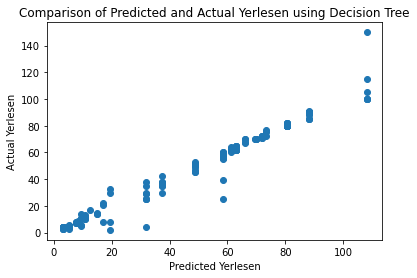

In [103]:
plt.scatter(y_pred, valid_y)
plt.title("Comparison of Predicted and Actual Yerlesen using Decision Tree")
plt.xlabel("Predicted Yerlesen")
plt.ylabel("Actual Yerlesen")

Text(0, 0.5, 'Actual Yerlesen')

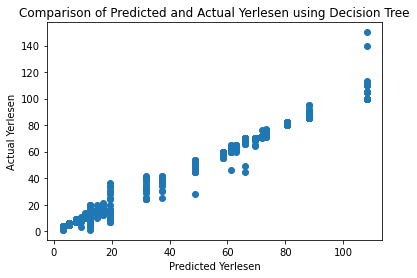

In [104]:
plt.scatter(y_pred_tra, y)
plt.title("Comparison of Predicted and Actual Yerlesen using Decision Tree")
plt.xlabel("Predicted Yerlesen")
plt.ylabel("Actual Yerlesen")